In [2]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("/content/Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#basic data overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()  # Summary statistics

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
# 2. Check missing values
df.isnull().sum()

,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


In [6]:
 #3. Unique values in categorical columns
print(df.nunique())
print(df['ShelveLoc'].value_counts())


Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64
ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64


#EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

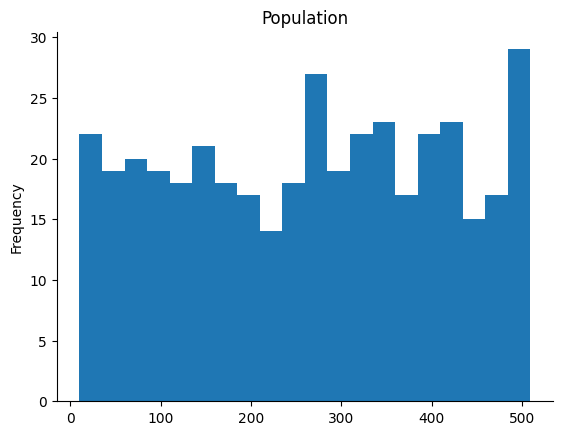

In [5]:
from matplotlib import pyplot as plt
df['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

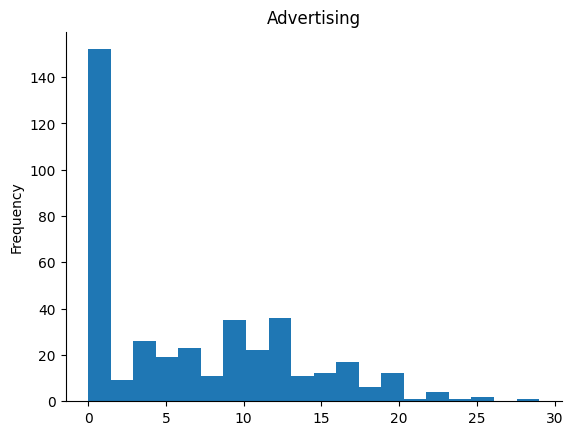

In [6]:
from matplotlib import pyplot as plt
df['Advertising'].plot(kind='hist', bins=20, title='Advertising')
plt.gca().spines[['top', 'right',]].set_visible(False)

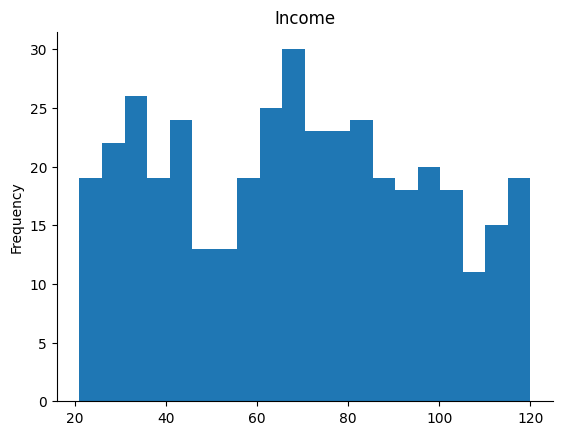

In [7]:
from matplotlib import pyplot as plt
df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

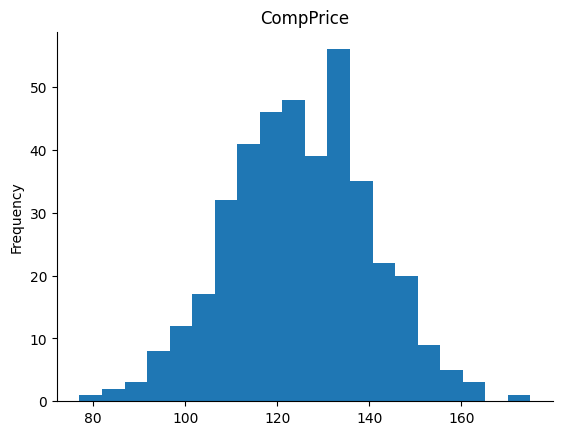

In [8]:
from matplotlib import pyplot as plt
df['CompPrice'].plot(kind='hist', bins=20, title='CompPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

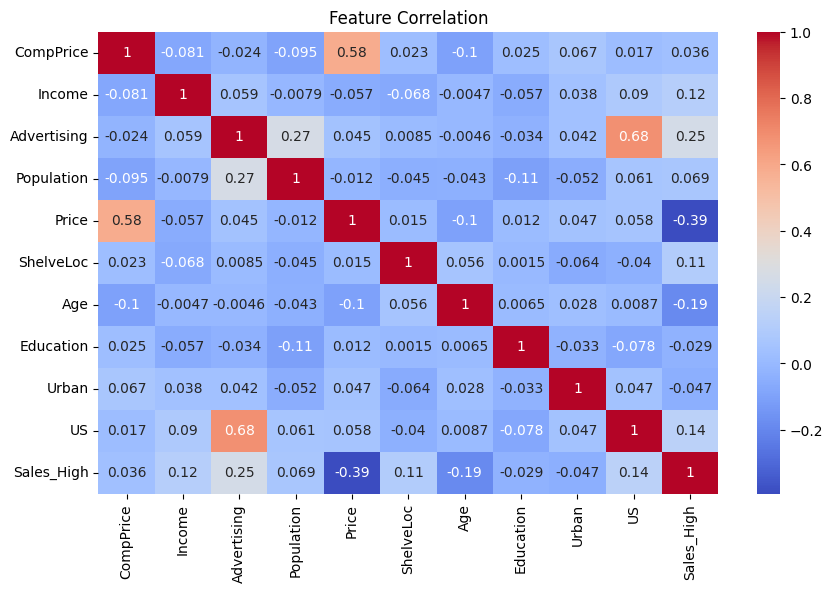

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

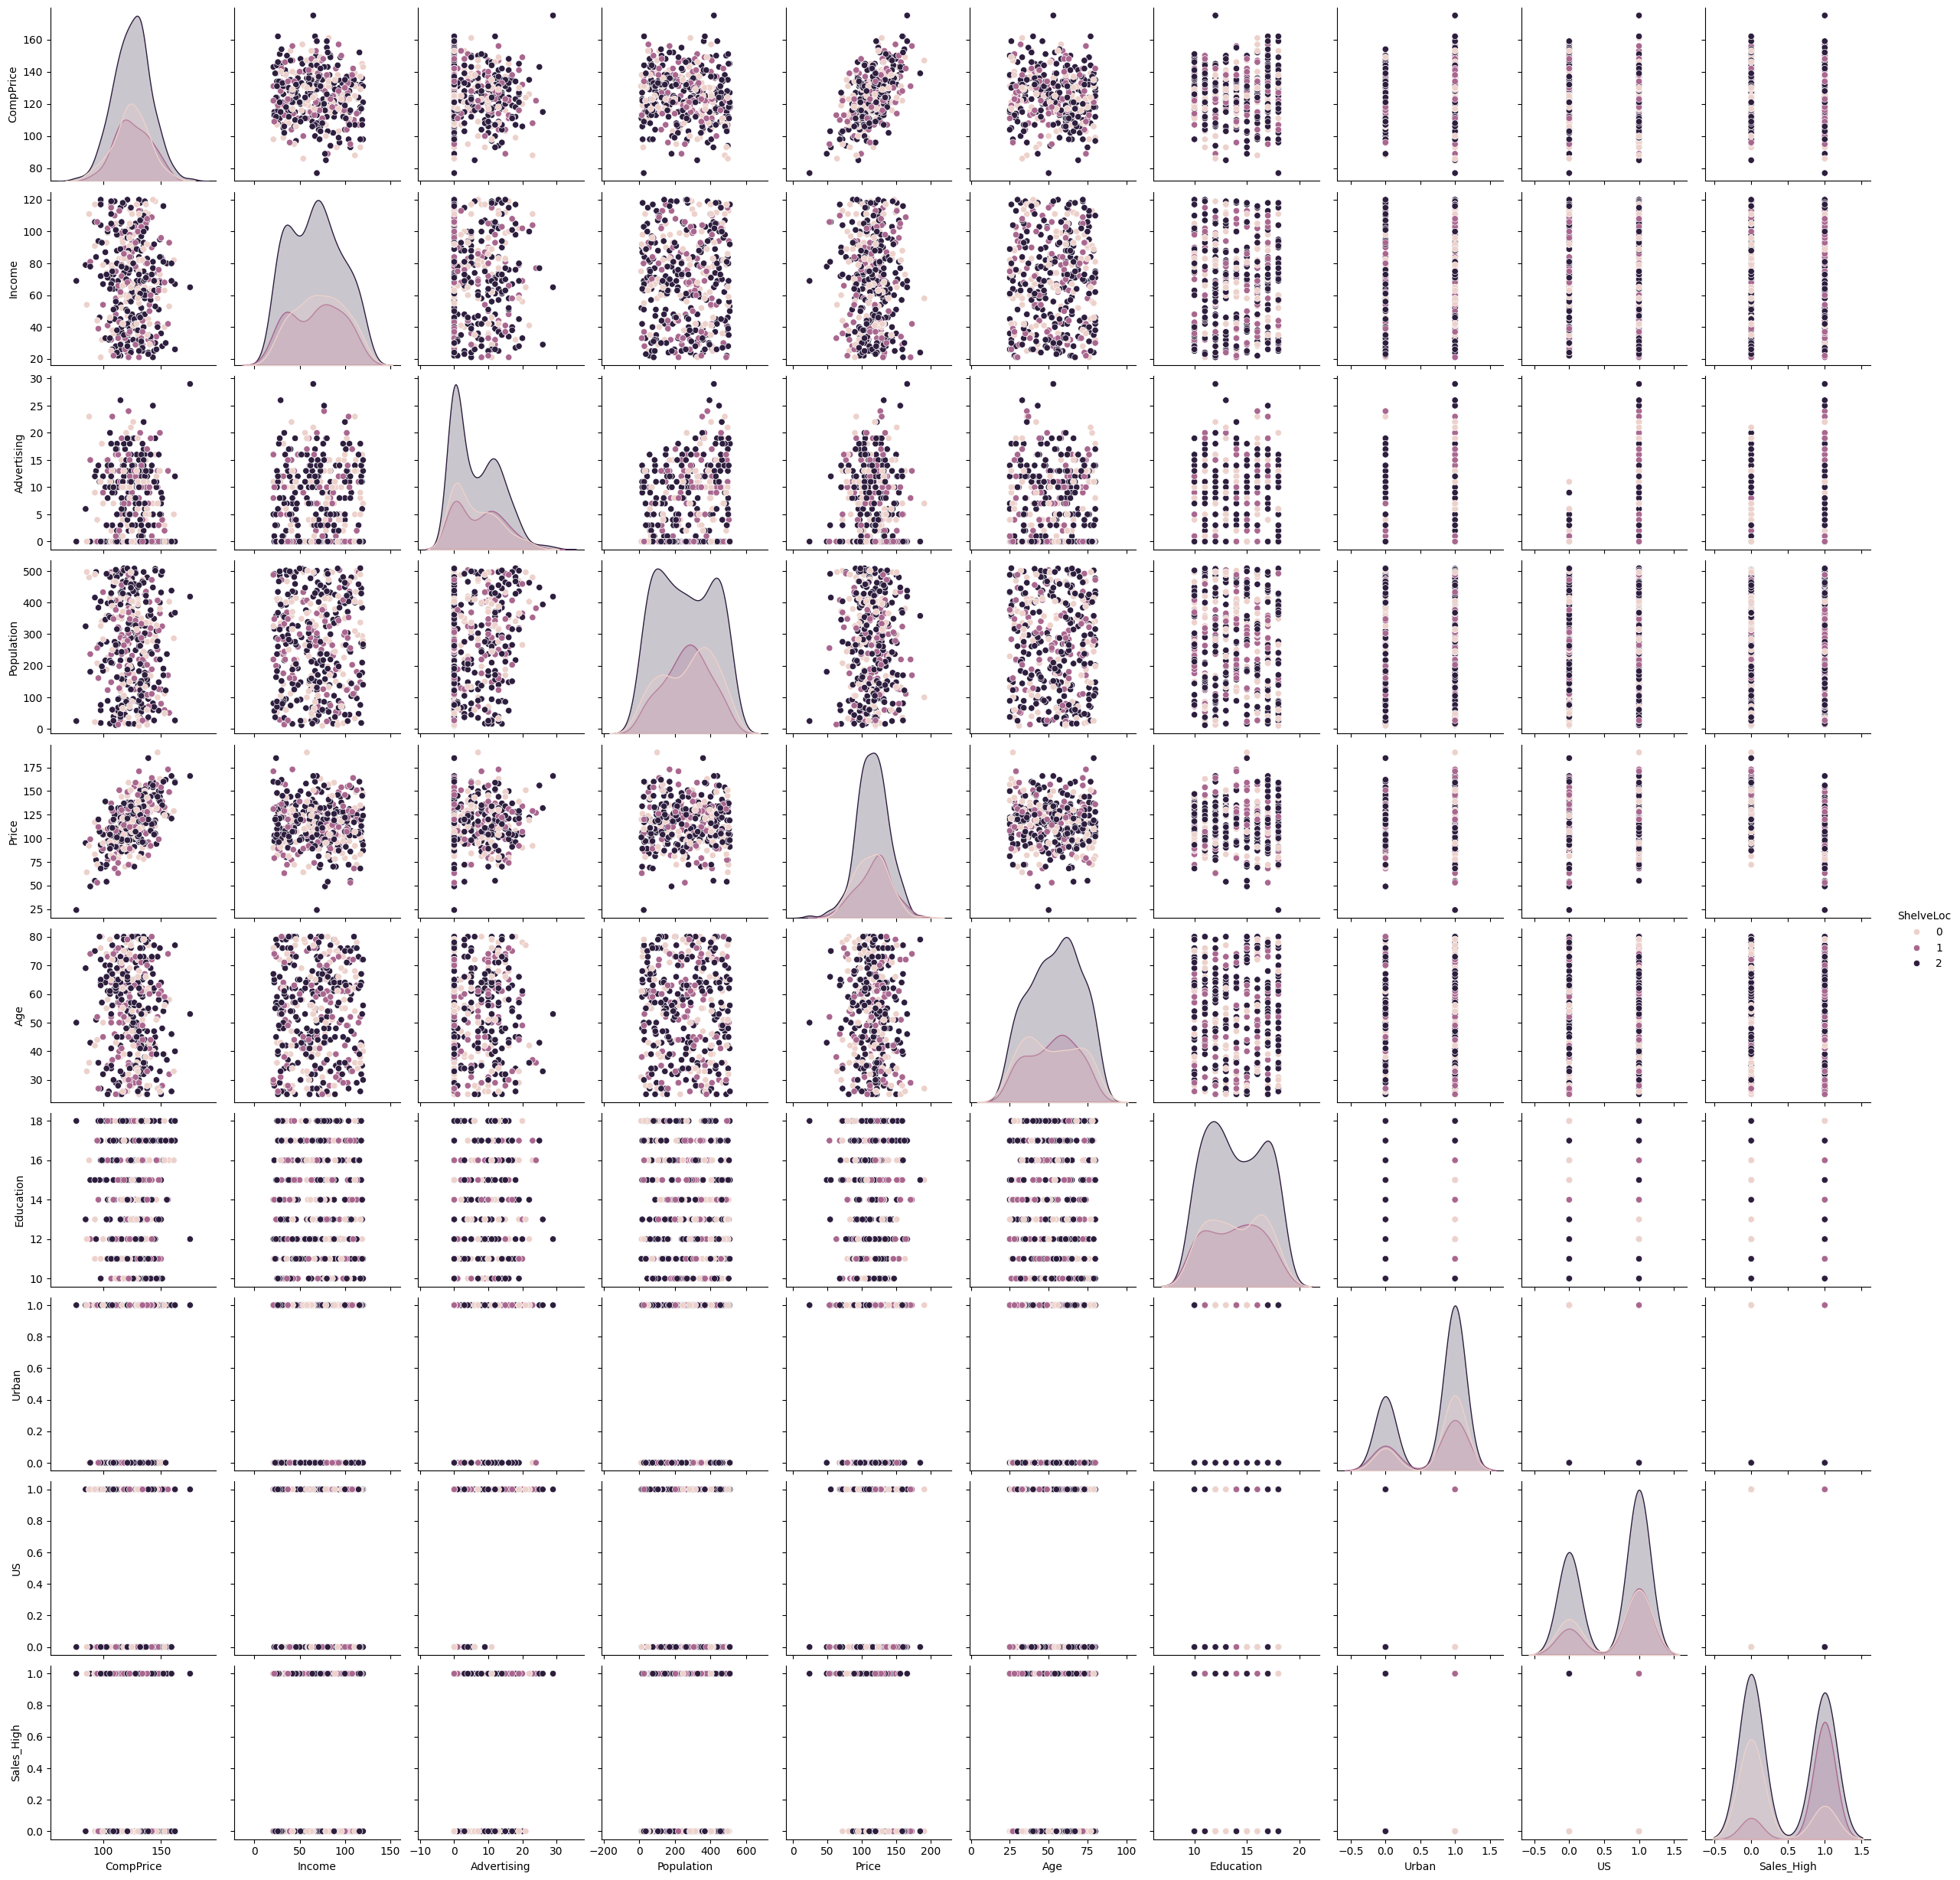

In [ ]:
# Pairplot for relationships
sns.pairplot(df, hue='ShelveLoc')
plt.show()

#decision tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Convert Sales into a binary target variable (High = 1, Low = 0)
df['Sales_High'] = np.where(df['Sales'] > df['Sales'].median(), 1, 0)

# Drop the original Sales column
df = df.drop(columns=['Sales'])

In [13]:
# Encode categorical variables
label_encoders = {}
for col in ['ShelveLoc', 'Urban', 'US']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
# Split dataset into train and test sets
X = df.drop(columns=['Sales_High'])
y = df['Sales_High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Train Decision Tree with optimized hyperparameters
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [16]:
# Predictions and evaluation
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.70      0.82      0.76        40\n           1       0.79      0.65      0.71        40\n\n    accuracy                           0.74        80\n   macro avg       0.75      0.74      0.74        80\nweighted avg       0.75      0.74      0.74        80\n'

This classification report indicates that your Decision Tree model has a 74% accuracy.

#random forest

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [19]:
# Define features and target
X = df.drop(columns=['Sales_High'])
y = df['Sales_High']

In [20]:
# Create a LabelEncoder for the 'ShelveLoc' column
le = LabelEncoder()
X['ShelveLoc'] = le.fit_transform(X['ShelveLoc']) # Encode 'ShelveLoc'

# Create LabelEncoders for other categorical columns: 'Urban', 'US'
for col in ['Urban', 'US']:  # Include 'Urban' and 'US'
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode these columns as well

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Train best RandomForest model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate RandomForest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
cross_val_r2_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2').mean()

print(f"RandomForest Best Parameters: {grid_search_rf.best_params_}")
print(f"RandomForest RMSE: {rmse_rf:.4f}")
print(f"RandomForest R² Score: {r2_rf:.4f}")
print(f"RandomForest Cross-Validation R²: {cross_val_r2_rf:.4f}")

RandomForest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest RMSE: 0.3832
RandomForest R² Score: 0.4094
RandomForest Cross-Validation R²: 0.3988
